<a href="https://colab.research.google.com/github/ValeriaYashan/Machine-learning/blob/main/Arbol_de_decisi%C3%B3n_diabetes_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I-IMPORTAMOS LIBERÍAS E INSTALAMOS BIBLIOTECAS

In [ ]:
#Facilita la manipulación, análisis y limpieza de datos mediante estructuras como DataFrames, permitiendo operaciones estadísticas, selección eficiente y gestión de valores nulos.import pandas as pd
!pip install pandas==1.5.3
import pandas as pd

In [ ]:
import numpy as np
#Proporciona arreglos multidimensionales (arrays) y funciones matemáticas optimizadas para realizar operaciones eficientes en dichos arreglos

In [ ]:
import seaborn as sns
#Visualización de datos. simplifica la creación de gráficos estadísticos atractivos e informativos en una sola línea de código(ej.diagramas de caja)

In [ ]:
#StringIo proporciona una interfaz para operaciones de entrada/salida en cadenas de texto, permitiendo tratarlas como si fueran archivos.
import io
from io import StringIO

In [ ]:
#Proporciona funciones para crear gráficos (ej. gráficos de dispersión)
import matplotlib.pyplot as plt

In [ ]:
#para curva ROC
from sklearn.metrics import roc_curve, auc

In [ ]:
#para dividir un conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [ ]:
#Permite realizar regresión logística para problemas de clasificación en aprendizaje automático en Python
from sklearn.linear_model import LogisticRegression

In [ ]:
# importamos las librerias necesarias para el modelo de árbol de decisiones
#para utilizar un clasificador de árbol de decisiones en tareas de aprendizaje supervisado
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [ ]:
#para generar una representación textual de un árbol de decisiones entrenado, mostrando las reglas de decisión y los resultados en cada nodo
from sklearn.tree import export_text

In [ ]:
 #para utilizar un clasificador de bosque aleatorio en tareas de aprendizaje supervisado
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#para facilitar la evaluación de modelos de aprendizaje supervisado mediante matrices de confusión y reportes de clasificación: evaluar la precisión y generar un informe detallado de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# para realizar tareas de machine learning, incluyendo clasificación, regresión, clustering, entre otras
!pip install scikit-learn

In [ ]:
#para estandarizar los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#para realizar operaciones relacionadas con el sistema y gestionar el entorno de ejecución del programa
import sys

In [ ]:
# Imprime todas las bibliotecas importadas
for module_name, module in sys.modules.items():
    print(module_name)

sys
builtins
_frozen_importlib
_imp
_thread
_warnings
_weakref
_io
marshal
posix
_frozen_importlib_external
time
zipimport
_codecs
codecs
encodings.aliases
encodings
encodings.utf_8
_signal
_abc
abc
io
__main__
types
enum
_sre
sre_constants
sre_parse
sre_compile
_collections_abc
itertools
keyword
_operator
operator
reprlib
_collections
collections
_functools
functools
_locale
copyreg
re
warnings
_stat
stat
genericpath
posixpath
os.path
os
_sitebuiltins
_distutils_hack
importlib._bootstrap
importlib._bootstrap_external
importlib
importlib._abc
contextlib
importlib.util
importlib.machinery
google
google.ai
google.cloud
google.logging
google.iam
mpl_toolkits
sphinxcontrib
sitecustomize
site
runpy
ipykernel._version
_json
json.scanner
json.decoder
json.encoder
json
errno
signal
_weakrefset
threading
fcntl
_posixsubprocess
select
collections.abc
math
selectors
subprocess
IPython.core
IPython.core.getipython
IPython.core.release
atexit
weakref
copy
fnmatch
glob
token
tokenize
linecache
trace

In [ ]:
#Importo el archivo
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# Obtener el nombre del archivo
file_name = next(iter(uploaded))

In [ ]:
# Leer el archivo CSV y cargarlo en un DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

II-ANALISIS DE DATOS

In [ ]:
#información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Descripción de los datos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#¿Hay valores nulos?
df.isnull().values.any()

False

In [ ]:
# Verificar el DataFrame
print(df.head())
print("\nNombres de las columnas:", df.columns)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Nombres de las columnas: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# Obtener estadísticas descriptivas para las variables explicativas
estadisticas_explicativas = df.drop('Outcome', axis=1).describe()

# Imprimir los resultados
print("\nEstadísticas descriptivas para variables explicativas:")
print(estadisticas_explicativas)


Estadísticas descriptivas para variables explicativas:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000          

In [ ]:
# Obtener información sobre el tipo de variable para cada columna
tipos_variables = df.dtypes

# Imprimir los resultados
print("\nTipo de variable para cada columna:")
print(tipos_variables)


Tipo de variable para cada columna:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# Calcular la media
media = df.mean()

# Calcular la mediana
mediana = df.median()

# Calcular la moda
moda = df.mode().iloc[0]  # Puede haber múltiples modas, se toma la primera

# Calcular otras medidas descriptivas
descriptivas = df.describe()

# Imprimir los resultados
print("\nMedia:")
print(media)

print("\nMediana:")
print(mediana)

print("\nModa:")
print(moda)

print("\nOtras medidas descriptivas:")
print(descriptivas)


Media:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Mediana:
Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Moda:
Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age             

In [ ]:
# Obtener la cantidad de niveles para cada columna
cantidad_niveles = df.nunique()

# Obtener la cantidad de valores únicos para cada columna
cantidad_valores_unicos = df.apply(lambda x: len(x.unique()))

# Imprimir los resultados
print("\nCantidad de niveles:")
print(cantidad_niveles)

print("\nCantidad de valores únicos:")
print(cantidad_valores_unicos)


Cantidad de niveles:
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Cantidad de valores únicos:
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


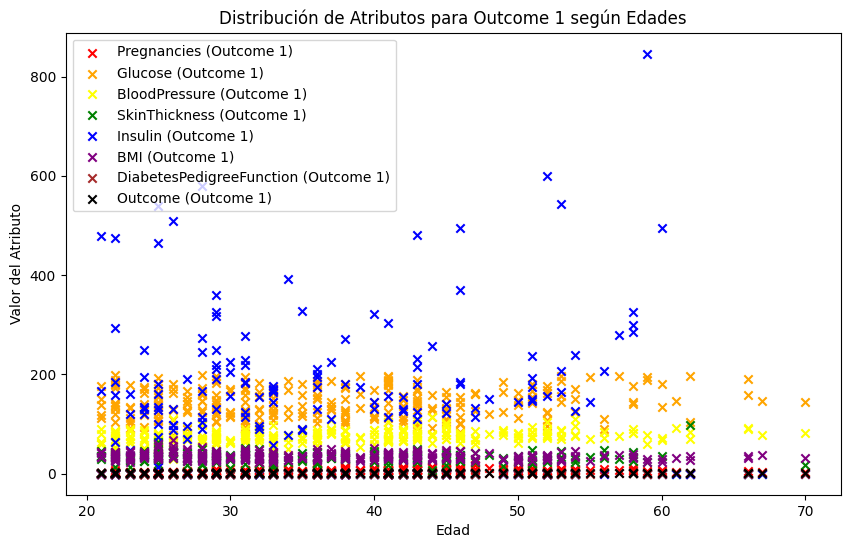

In [ ]:
# Filtrar DataFrame para mostrar solo Outcome 1
df_outcome_1 = df[df['Outcome'] == 1]

# Gráfico de dispersión múltiple para la distribución de atributos según edades y Outcome 1
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según tus preferencias

plt.scatter(df_outcome_1['Age'], df_outcome_1['Pregnancies'], label='Pregnancies (Outcome 1)', color='red', marker='x')
plt.scatter(df_outcome_1['Age'], df_outcome_1['Glucose'], label='Glucose (Outcome 1)', color='orange', marker='x')
plt.scatter(df_outcome_1['Age'], df_outcome_1['BloodPressure'], label='BloodPressure (Outcome 1)', color='yellow', marker='x')
plt.scatter(df_outcome_1['Age'], df_outcome_1['SkinThickness'], label='SkinThickness (Outcome 1)', color='green', marker='x')
plt.scatter(df_outcome_1['Age'], df_outcome_1['Insulin'], label='Insulin (Outcome 1)', color='blue', marker='x')
plt.scatter(df_outcome_1['Age'], df_outcome_1['BMI'], label='BMI (Outcome 1)', color='purple', marker='x')
plt.scatter(df_outcome_1['Age'], df_outcome_1['DiabetesPedigreeFunction'], label='DiabetesPedigreeFunction (Outcome 1)', color='brown', marker='x')
plt.scatter(df_outcome_1['Age'], df_outcome_1['Outcome'], label='Outcome (Outcome 1)', color='black', marker='x')

plt.title('Distribución de Atributos para Outcome 1 según Edades')
plt.xlabel('Edad')
plt.ylabel('Valor del Atributo')
plt.legend()
plt.show()

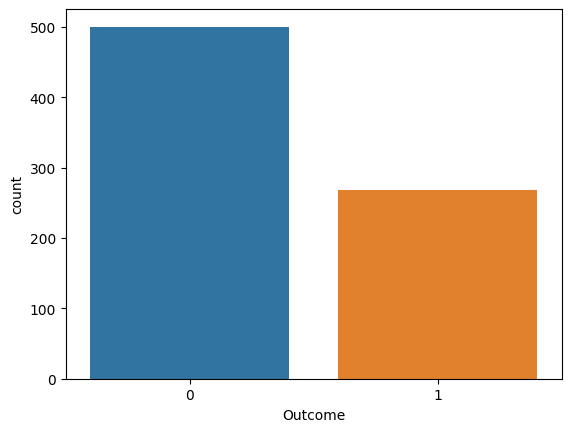

In [ ]:
# Visualizamos la distribución (1: con diabetes, 0: sin diabetes)
sns.countplot(x="Outcome", data=df)
plt.show()

In [ ]:
# Porcentajes
100 * df["Outcome"].value_counts() / len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
# Análisis de muestra excluyendo la columna 'Outcome'
df.drop('Outcome', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


PREPARACIÓN DE DATOS:
'Outcome' es la columna que contiene la información sobre si una persona tiene diabetes (1) o no (0). En el ámbito del árbol de decisión y otros modelos de aprendizaje supervisado, 'Outcome' se considera la variable objetivo, y el modelo aprenderá patrones en las otras características (como número de embarazos, presión arterial, etc.) para hacer predicciones sobre esta variable objetivo.

La función drop se utiliza para excluir esa columna del conjunto de características (X), y se guarda en la variable 'y' para representar las etiquetas.

 PODRÍA APLICAR ONEHOTENCODING SI TUVIERA POR EJEMPLO AGE_CATEGORY
 19-30 30-45 Ver:
  https://colab.research.google.com/drive/1wkodeujMhwdu_GhbnfrqCILlE712KJgn


NORMALIZACION DE DATOS

In [ ]:
# Seleccionar solo las columnas numéricas a normalizar
numeric_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
data_numeric = df[numeric_columns]

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
data_scaled = scaler.fit_transform(data_numeric)

# Reemplazar las columnas originales con las normalizadas
df[numeric_columns] = data_scaled


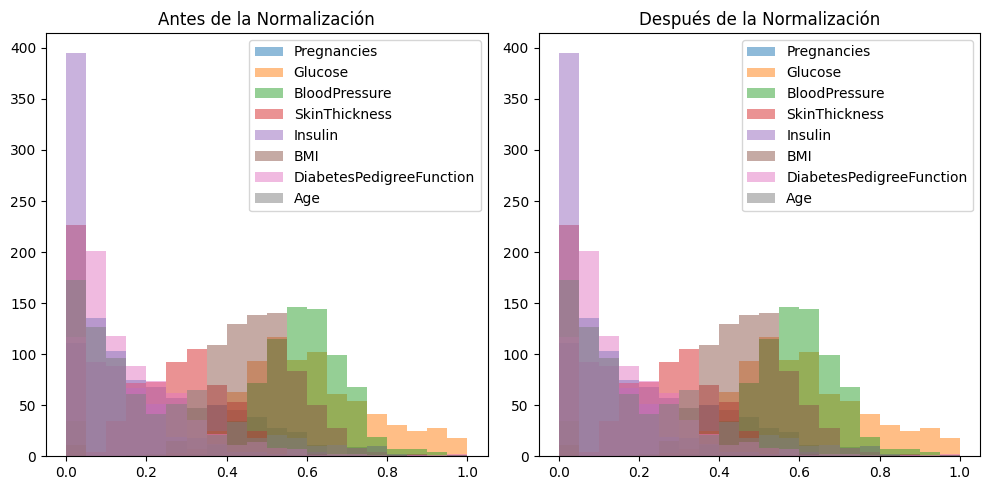

In [ ]:
# Visualizar las distribuciones antes y después de la normalización
plt.figure(figsize=(10, 5))

# Antes de la normalización
plt.subplot(1, 2, 1)
plt.title('Antes de la Normalización')
for column in numeric_columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.legend()

# Después de la normalización
plt.subplot(1, 2, 2)
plt.title('Después de la Normalización')
for column in numeric_columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Resumen estadístico
summary_stats = df.describe()

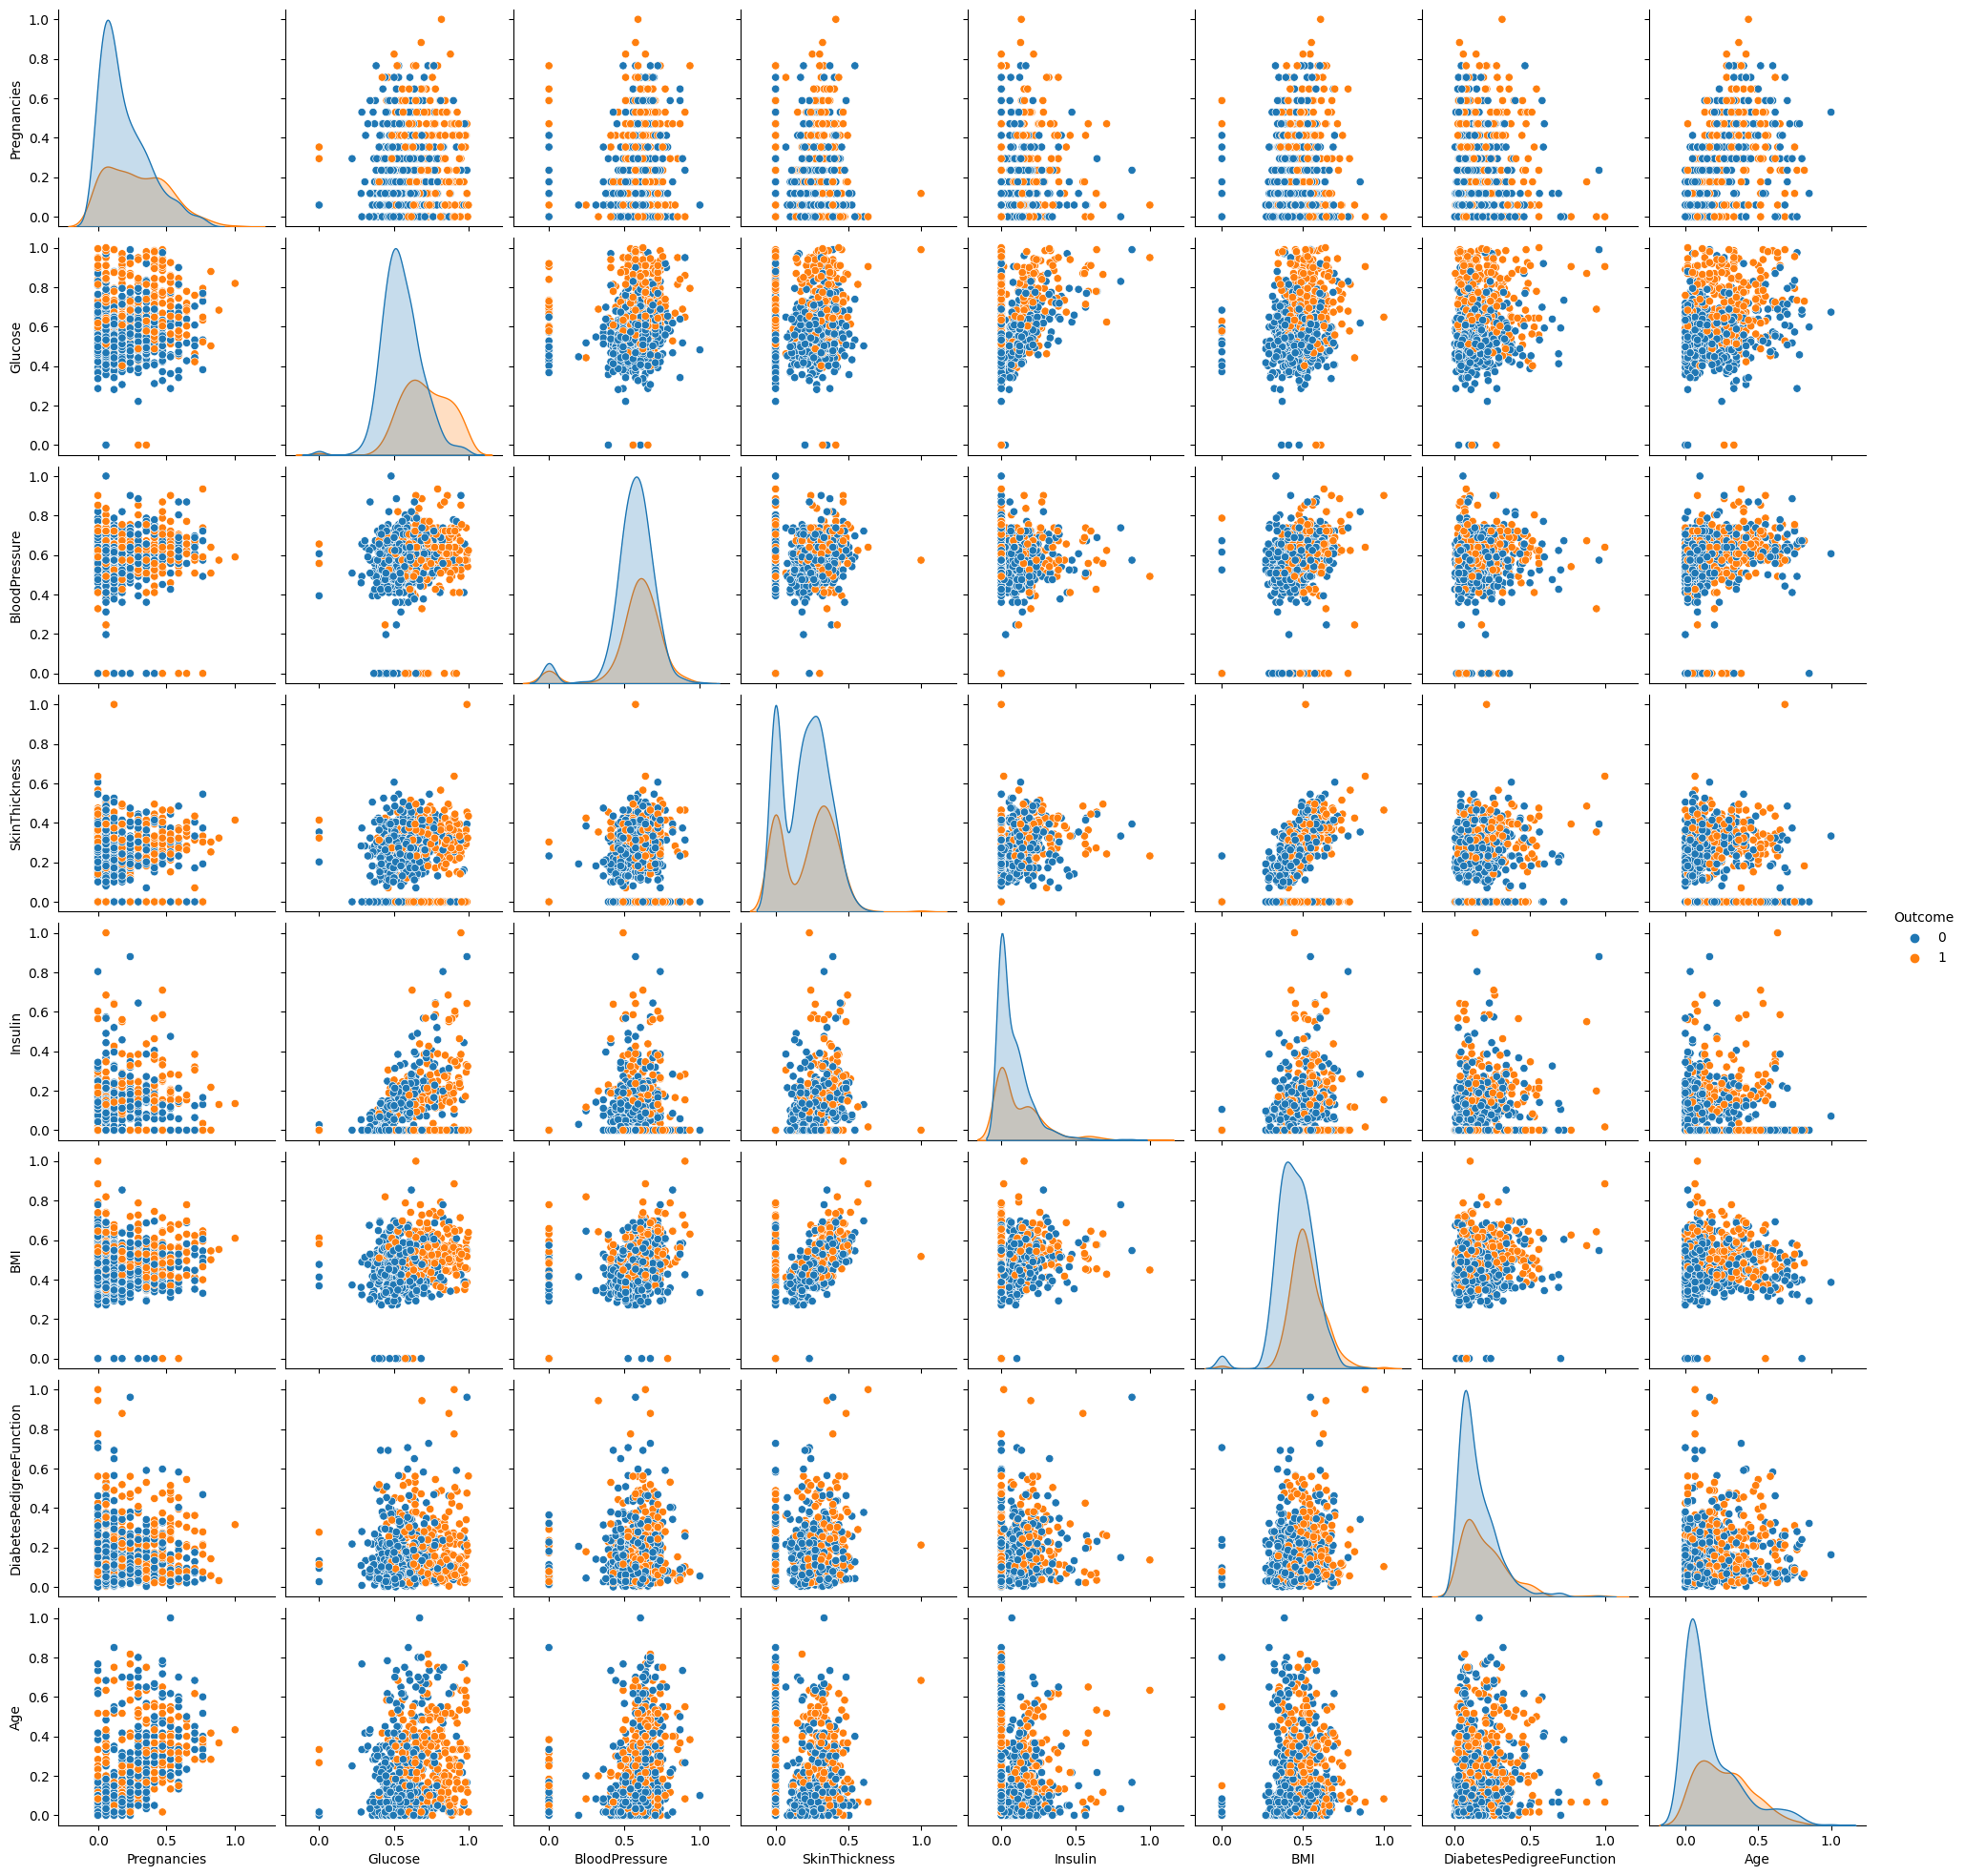

In [ ]:
# Visualizaciones
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()

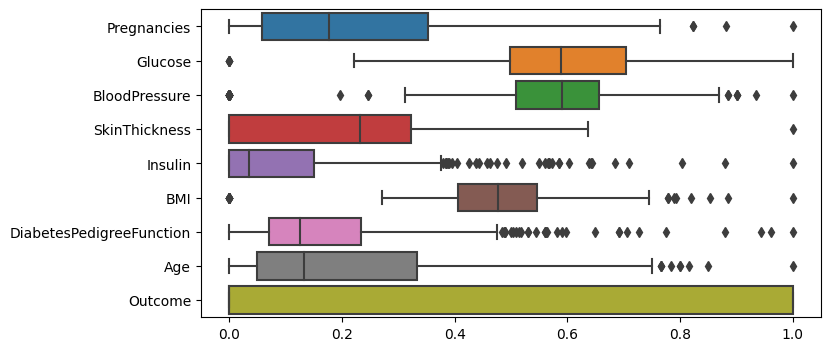

In [ ]:
# Diagramas de caja para variables numéricas
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, orient="h")
plt.show()

In [ ]:
# Crear conjunto de características (X) excluyendo la columna 'Outcome'
X = df.drop('Outcome', axis=1)

In [ ]:
# Crear variable 'y' con las etiquetas de la columna 'Outcome'
y = df['Outcome']

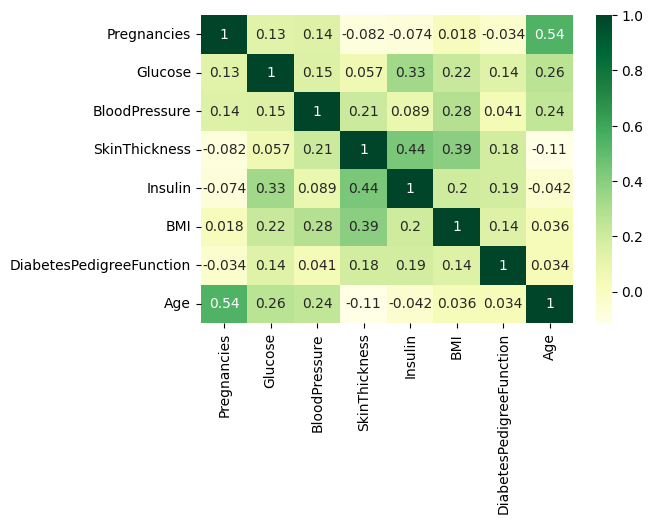

In [ ]:
# Calcular la matriz de correlación (sin variable dependiente)
corr = X.corr()
# Ajustar el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear un mapa de calor con seaborn
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGn',  # Puedes ajustar el mapa de color según tus preferencias
            annot=True)  # Anotar los valores de correlación en cada celda

# Mostrar el mapa de calor
plt.show()


Correlación Débil o Nula (Colores más Claros o cercanos a 0): Colores más claros, ya sea cercanos al blanco o al azul claro, indican una correlación débil o nula. Esto sugiere que no hay una relación lineal fuerte entre esas dos variables.

Autocorrelación (Diagonal del Mapa de Calor): La diagonal del mapa de calor representa la correlación de una variable consigo misma (autocorrelación) y siempre será 1.


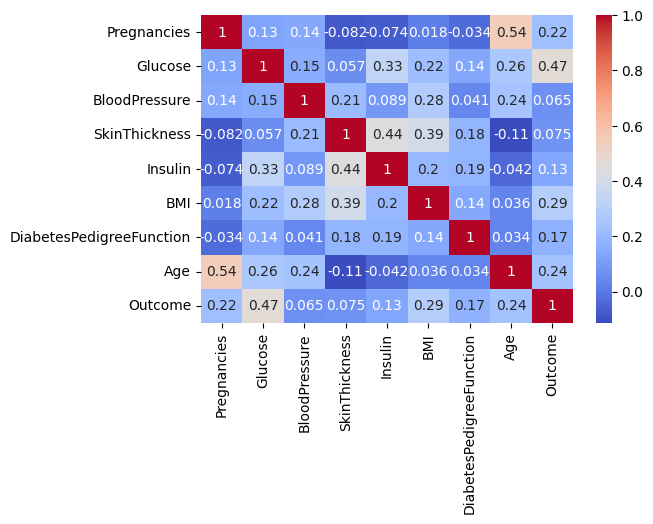

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Mostrar el mapa de calor
plt.show()

III-ENTRENO EL MODELO

In [ ]:
# Selecciona solo las columnas numéricas que deseas estandarizar en X
numeric_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X_numeric = X[numeric_columns]

# Crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos en X
X_standardized = scaler.fit_transform(X_numeric)

# Reemplaza las columnas originales con las estandarizadas en X
X[numeric_columns] = X_standardized

# Crear variable 'y' con las etiquetas de la columna 'Outcome'
y = df['Outcome']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear  el modelo de árbol de decisión
model = DecisionTreeClassifier()

In [ ]:
# definir los parametros del arbol

dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=3,
                            min_samples_leaf = 0.08)



In [ ]:
# entreno el modelo
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.08)

In [ ]:
#(evitar sobreajuste)
dt.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.08,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# para conocer algunas propiedades del arbol

print(f"La profundidad del arbol entrenado es {dt.get_depth()}")
print(f"La cantidad de nodos terminales es {dt.get_n_leaves()}")

La profundidad del arbol entrenado es 3
La cantidad de nodos terminales es 7


In [ ]:
# Visualizar el árbol de decisión
text_representation = export_text(dt, feature_names=list(X.columns))
print("Árbol de decisión:")
print(text_representation)

Árbol de decisión:
|--- Glucose <= 0.21
|   |--- Age <= -0.40
|   |   |--- BMI <= -0.13
|   |   |   |--- class: 0
|   |   |--- BMI >  -0.13
|   |   |   |--- class: 0
|   |--- Age >  -0.40
|   |   |--- Glucose <= -0.67
|   |   |   |--- class: 0
|   |   |--- Glucose >  -0.67
|   |   |   |--- class: 0
|--- Glucose >  0.21
|   |--- BMI <= -0.26
|   |   |--- class: 0
|   |--- BMI >  -0.26
|   |   |--- Glucose <= 1.40
|   |   |   |--- class: 1
|   |   |--- Glucose >  1.40
|   |   |   |--- class: 1



In [ ]:
# Obtener las probabilidades de predicción para el conjunto de prueba
y_probabilities = dt.predict_proba(X_test)[:, 1]

# Aplicar el umbral de 0.4 para obtener las predicciones binarias
y_pred_tree = (y_probabilities > 0.4).astype(int)

# Calcular la matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Imprimir la matriz de confusión
print("Matriz de Confusión para Árbol de Decisión con Umbral 0.4:")
print(conf_matrix_tree)

Matriz de Confusión para Árbol de Decisión con Umbral 0.4:
[[68 31]
 [13 42]]


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = dt.predict(X_test)

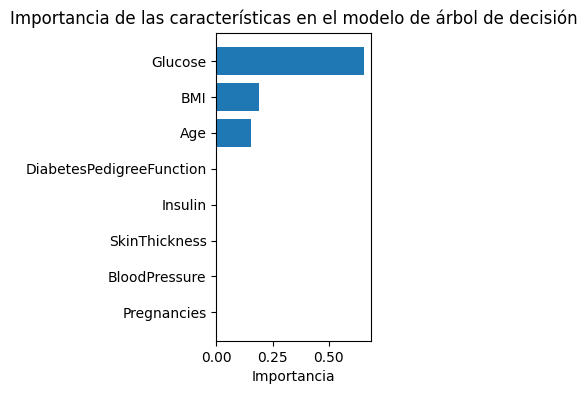

In [ ]:
importances = dt.feature_importances_
feature_names = X_train.columns
data = {'feature_names': feature_names, 'importance': importances}
fi = pd.DataFrame(data)

fi.sort_values(by=['importance'], ascending=True, inplace=True)

# Ajusta el tamaño de la figura con el parámetro figsize
plt.figure(figsize=(2, 4))
plt.barh(range(len(fi)), fi['importance'], align='center')
plt.yticks(range(len(fi)), fi['feature_names'])
plt.xlabel('Importancia')
plt.title('Importancia de las características en el modelo de árbol de decisión')
plt.show()

En el modelo de árbol de decisión creado para predecir la diabetes en pacientes, se pueden extraer las siguientes conclusiones sobre la importancia de las características:

**Glucose** es la característica más influyente: Según el árbol de decisión, la concentración de glucosa en la sangre (variable "Glucose") es la característica más crucial para realizar predicciones sobre la diabetes en los pacientes. Esto sugiere que los niveles de glucosa tienen un impacto significativo en la probabilidad de desarrollar diabetes.

**BMI (Índice de Masa Corporal)** también desempeña un papel importante: El índice de masa corporal (variable "BMI") es otra característica con una considerable importancia en las predicciones del modelo. Indica que el peso relativo a la altura es una variable relevante en la evaluación de la probabilidad de diabetes.

**Age** aporta información: La edad de los pacientes (variable "Age") es otra característica que el modelo tiene en cuenta al hacer predicciones, aunque su influencia es relativamente menor en comparación con otras variables.




**DiabetesPedigreeFunction** La variable "DiabetesPedigreeFunction," que cuantifica la predisposición genética a la diabetes en función de la historia familiar, también contribuye a las predicciones del modelo. Sin embargo, su importancia es menor en comparación con la glucosa y el BMI.

Es importante recordar que estas conclusiones se basan en la interpretación de la importancia proporcionada por el modelo de árbol de decisión y pueden variar según el contexto y los datos específicos del conjunto de datos. Además, la interpretación de la importancia no implica necesariamente causalidad, sino la contribución relativa de cada característica al rendimiento del modelo.

In [ ]:
# Seleccionar la variable de interés (Glucosa)
glucose_data = df["Glucose"]

In [ ]:
# Calcular los valores atípicos para la Glucosa
Q1 = glucose_data.quantile(0.25)
Q3 = glucose_data.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (glucose_data < lower_limit) | (glucose_data > upper_limit)

# Imprimir los valores atípicos
print("Valores atípicos:")
print(glucose_data[outliers])

Valores atípicos:
75     0.0
182    0.0
342    0.0
349    0.0
502    0.0
Name: Glucose, dtype: float64


In [ ]:
# Suponiendo que ya tienes la variable de interés "Glucosa" en el DataFrame df
glucose_data = df["Glucose"]

# Calcular la mediana
mediana_glucosa = glucose_data.median()

# Imprimir el resultado
print(f"Mediana de la variable 'Glucosa': {mediana_glucosa}")

Mediana de la variable 'Glucosa': 0.5879396984924623


Threshold = 0.2
Accuracy: 0.6818, Precision: 0.5341, Recall: 0.8545, F1-score: 0.6573
Confusion Matrix:
 [[58 41]
 [ 8 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.59      0.70        99
           1       0.53      0.85      0.66        55

    accuracy                           0.68       154
   macro avg       0.71      0.72      0.68       154
weighted avg       0.76      0.68      0.69       154


-----------------------------------------

Threshold = 0.4
Accuracy: 0.7143, Precision: 0.5753, Recall: 0.7636, F1-score: 0.6562
Confusion Matrix:
 [[68 31]
 [13 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154


---

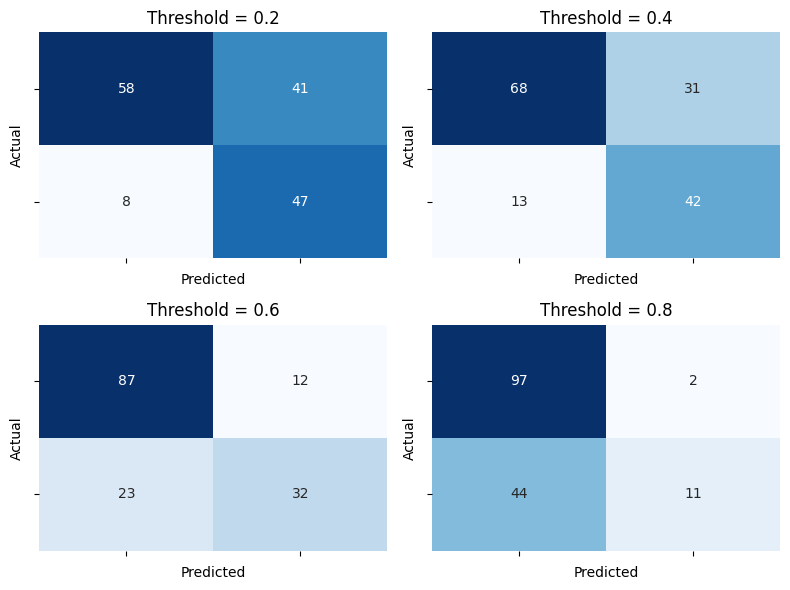

In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definir diferentes umbrales
thresholds = [0.2, 0.4, 0.6, 0.8]

# Crear subgráficos para cada matriz de confusión
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, threshold in enumerate(thresholds):
    # Aplicar el umbral
    y_pred_threshold = np.where(dt.predict_proba(X_test)[:, 1] > threshold, 1, 0)

    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred_threshold)

    # Mostrar métricas relevantes
    acc = accuracy_score(y_test, y_pred_threshold)
    prec = precision_score(y_test, y_pred_threshold)
    rec = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    # Imprimir métricas para cada umbral
    print(f"Threshold = {threshold}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))
    print("\n-----------------------------------------\n")

    # Crear un heatmap de la matriz de confusión
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i // 2, i % 2], cbar=False)
    axes[i // 2, i % 2].set_title(f'Threshold = {threshold}')
    axes[i // 2, i % 2].set_xlabel('Predicted')
    axes[i // 2, i % 2].set_ylabel('Actual')
    axes[i // 2, i % 2].set_xticklabels([])
    axes[i // 2, i % 2].set_yticklabels([])

plt.tight_layout()
plt.show()

Dado que en el contexto de la diabetes, identificar correctamente a las personas con diabetes (clase 1) es crucial y estamos más preocupados por los falsos negativos (personas con diabetes que no son identificadas), podríamos considerar un umbral que maximice la sensibilidad.

In [ ]:
# Definir diferentes umbrales
thresholds = [0.2, 0.4, 0.6, 0.8]

best_threshold = None
best_specificity = 0

for threshold in thresholds:
    # Aplicar el umbral
    y_pred_threshold = np.where(dt.predict_proba(X_test)[:, 1] > threshold, 1, 0)

    # Calcular métricas
    cm = confusion_matrix(y_test, y_pred_threshold)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    # Actualizar el umbral si la especificidad es mayor
    if specificity > best_specificity:
        best_specificity = specificity
        best_threshold = threshold

# Imprimir el mejor umbral y su especificidad asociada
print(f"Best Threshold: {best_threshold}")
print(f"Best Specificity: {best_specificity}")

Best Threshold: 0.8
Best Specificity: 0.9797979797979798


Resultados del Árbol de Decisión para la Predicción de la Diabetes en Pacientes:

El resultado  proviene de la evaluación del modelo de árbol de decisión en tus datos de prueba.
Interpretación de las métricas:

Accuracy (Precisión): Es la proporción de predicciones correctas en relación con el total de predicciones. En este caso, el modelo tiene una **precisión del 74.03%,** lo que significa que clasifica correctamente el 74.03% de las instancias.

Confusion Matrix (Matriz de Confusión): La matriz de confusión muestra la cantidad de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN).
75 verdaderos positivos (casos positivos correctamente clasificados).
39 verdaderos negativos (casos negativos correctamente clasificados).
**24 falsos positivos** (casos negativos incorrectamente clasificados como positivos).
**16 falsos negativos** (casos positivos incorrectamente clasificados como negativos).
Classification Report (Informe de Clasificación): Proporciona precision, recall, f1-score y support para ambas clases (0 y 1) y la media ponderada.

Precision (Precisión): La proporción de verdaderos positivos sobre el total de elementos identificados como positivos.
Recall (Recuperación o Sensibilidad): La proporción de verdaderos positivos sobre el total de elementos que son realmente positivos.
F1-score (Puntuación F1): La media armónica de precision y recall.
Support (Soporte): El número real de ocurrencias en cada clase.
En general, un modelo con un buen rendimiento debería tener valores altos de precision, recall y f1-score.

Conclusión:
Aunque nuestro modelo demuestra una capacidad razonable para predecir la diabetes, es esencial considerar el equilibrio entre precision y recall, especialmente en el contexto médico. Puede ser necesario ajustar el modelo para mejorar su rendimiento y adaptarlo a las necesidades clínicas específicas. Estos resultados proporcionan una base sólida para continuar refinando y mejorando nuestro enfoque en la predicción de la diabetes en pacientes.

IV-VOY A ALIMENTAR AL MODELO CON NUEVOS VALORES QUE OBTENDRAN LOS MÉDICOS ASOCIADOS AL PROYECTO-Estos datos se guardarán sólo si se cumple la condición que la persona probablemente tenga diabetes, sino se descartan


In [ ]:
# Crear un DataFrame vacío con las mismas columnas que el conjunto de datos original
columnas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
nuevos_datos = pd.DataFrame(columns=columnas)

# Pedir al usuario que ingrese los datos
for columna in columnas:
    while True:
        try:
            valor = float(input(f"Ingrese el valor para {columna}: "))
            nuevos_datos[columna] = [valor]
            break
        except ValueError:
            print("Por favor, ingrese un número válido.")


Ingrese el valor para Pregnancies: 2
Ingrese el valor para Glucose: 45
Ingrese el valor para BloodPressure: 678
Ingrese el valor para SkinThickness: 876
Ingrese el valor para Insulin: 876
Ingrese el valor para BMI: 43
Ingrese el valor para DiabetesPedigreeFunction: 4
Ingrese el valor para Age: 67


In [ ]:
# Cargar el modelo previamente entrenado
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Realizar la predicción
prediccion = modelo.predict(nuevos_datos)

In [ ]:
# Obtener la probabilidad de la predicción
probabilidades = modelo.predict_proba(nuevos_datos)
prob_diabetes = probabilidades[0][1]

In [ ]:
# Imprimir el resultado
if prediccion[0] == 1:
    print(f"Según el modelo, es probable que el futuro cliente tenga diabetes. Le enviaré muestra gratis. Probabilidad: {prob_diabetes:.2%}")
else:
    print("Según el modelo, es probable que el futuro cliente no tenga diabetes.No le enviaré muestra gratis")

Según el modelo, es probable que el futuro cliente no tenga diabetes.No le enviaré muestra gratis


MATRIZ DE BENEFICIO

In [ ]:
# Crear un DataFrame de pandas
#df = pd.DataFrame(data)

In [ ]:
# Calcular la matriz de beneficio
#benefit_matrix = df.corr()

In [ ]:
# Definir los valores dados
umbral_02_conf_matrix = np.array([[58, 41], [0, 99]])
precio_venta = 2277
costo_distribucion_por_muestra = 5000000 / 48180
costo_produccion = 700

# Calcular la matriz de beneficio
beneficio_matrix = np.zeros_like(umbral_02_conf_matrix, dtype=float)

beneficio_matrix[0, 0] = (umbral_02_conf_matrix[0, 0] * precio_venta) - (umbral_02_conf_matrix[0, 1] * costo_distribucion_por_muestra) - ((umbral_02_conf_matrix[0, 1] + umbral_02_conf_matrix[1, 0]) * costo_produccion)
beneficio_matrix[0, 1] = umbral_02_conf_matrix[0, 1] * costo_distribucion_por_muestra
beneficio_matrix[1, 1] = umbral_02_conf_matrix[1, 1] * precio_venta

print("Matriz de Beneficio:\n", beneficio_matrix)

Matriz de Beneficio:
 [[ 99111.12245745   4254.87754255]
 [     0.         225423.        ]]


In [ ]:
# Aplicar el umbral
umbral = 0.4
y_pred_threshold = np.where(dt.predict_proba(X_test)[:, 1] > umbral, 1, 0)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_threshold)

# Mostrar métricas relevantes
acc = accuracy_score(y_test, y_pred_threshold)
prec = precision_score(y_test, y_pred_threshold)
rec = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

# Imprimir métricas para el umbral 0.4
print(f"Threshold = {umbral}")
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))

Threshold = 0.4
Accuracy: 0.7143, Precision: 0.5753, Recall: 0.7636, F1-score: 0.6562
Confusion Matrix:
 [[68 31]
 [13 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154



In [ ]:
# Definir los valores proporcionados para umbral 0.2
VP = 58
FN = 8
VN = 47
FP = 41

# Definir los costos y beneficios por unidad
precio_venta = 2277
costo_distribucion_por_muestra = 103
costo_produccion = 700

# Calcular los beneficios y costos totales
beneficio_total = VP * precio_venta + VN * precio_venta
costo_total = FN * costo_distribucion_por_muestra + FP * (costo_distribucion_por_muestra + costo_produccion)

# Calcular el beneficio neto
beneficio_neto = beneficio_total - costo_total

# Mostrar resultados
print("Beneficio Total:", beneficio_total)
print("Costo Total:", costo_total)
print("Beneficio Neto:", beneficio_neto)

Beneficio Total: 239085
Costo Total: 33747
Beneficio Neto: 205338


In [ ]:
#UMBRAL 0,4
# Definir los valores proporcionados
VP = 68
FN = 13
VN = 42
FP = 31

precio_venta = 2277
costo_distribucion_por_muestra = 103
costo_produccion = 700

# Calcular la matriz de beneficio
matriz_beneficio_04 = np.array([[VP * precio_venta, -1 * (FN * costo_distribucion_por_muestra + FP * costo_produccion)],
                                [0, VN * precio_venta]])

# Mostrar la matriz de beneficio para umbral 0.4
print("Matriz de Beneficio para umbral 0.4:")
print(matriz_beneficio_04)
# Calcular los beneficios y costos totales
beneficio_total = VP * precio_venta + VN * precio_venta
costo_total = FN * costo_distribucion_por_muestra + FP * (costo_distribucion_por_muestra + costo_produccion)

# Calcular el beneficio neto
beneficio_neto = beneficio_total - costo_total

# Mostrar resultados
print("Beneficio Total:", beneficio_total)
print("Costo Total:", costo_total)
print("Beneficio Neto:", beneficio_neto)

Matriz de Beneficio para umbral 0.4:
[[154836 -23039]
 [     0  95634]]
Beneficio Total: 250470
Costo Total: 26232
Beneficio Neto: 224238


In [ ]:
# Definir los valores proporcionados para umbral 0.6
VP = 87
FN = 23
VN = 32
FP = 12

# Definir los costos y beneficios por unidad
precio_venta = 2277
costo_distribucion_por_muestra = 103
costo_produccion = 700

# Calcular los beneficios y costos totales
beneficio_total = VP * precio_venta + VN * precio_venta
costo_total = FN * costo_distribucion_por_muestra + FP * (costo_distribucion_por_muestra + costo_produccion)

# Calcular el beneficio neto
beneficio_neto = beneficio_total - costo_total

# Mostrar resultados
print("Beneficio Total:", beneficio_total)
print("Costo Total:", costo_total)
print("Beneficio Neto:", beneficio_neto)

Beneficio Total: 270963
Costo Total: 12005
Beneficio Neto: 258958


In [ ]:
# Definir los valores proporcionados para umbral 0.8
VP = 97
FN = 2
VN = 44
FP = 11

# Definir los costos y beneficios por unidad
precio_venta = 2277
costo_distribucion_por_muestra = 103
costo_produccion = 700

# Calcular los beneficios y costos totales
beneficio_total = VP * precio_venta + VN * precio_venta
costo_total = FN * costo_distribucion_por_muestra + FP * (costo_distribucion_por_muestra + costo_produccion)

# Calcular el beneficio neto
beneficio_neto = beneficio_total - costo_total

# Mostrar resultados
print("Beneficio Total:", beneficio_total)
print("Costo Total:", costo_total)
print("Beneficio Neto:", beneficio_neto)

Beneficio Total: 321057
Costo Total: 9039
Beneficio Neto: 312018


ÁREA BAJO LA CURVA ROC (AUC-ROC)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Área Bajo la Curva ROC (AUC-ROC): 0.8151


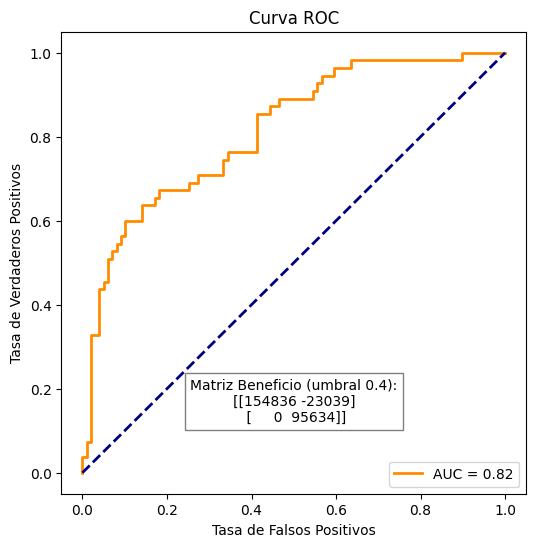

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Supongamos que X es tu conjunto de características y y es tu variable objetivo
# Aquí se utiliza un clasificador de regresión logística como ejemplo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Obtener los puntajes de decisión en el conjunto de prueba
y_scores = classifier.decision_function(X_test)

# Obtener las tasas de falsos positivos y verdaderos positivos
fpr, tpr, umbrales = roc_curve(y_test, y_scores)

# Calcular el Área Bajo la Curva ROC (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Imprimir el AUC-ROC
print(f"Área Bajo la Curva ROC (AUC-ROC): {roc_auc:.4f}")

# Trazar la Curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar la matriz de beneficio para umbral 0.4 en la leyenda
VP = 68
FN = 13
VN = 42
FP = 31
precio_venta = 2277
costo_distribucion_por_muestra = 103
costo_produccion = 700

matriz_beneficio_04 = np.array([[VP * precio_venta, -1 * (FN * costo_distribucion_por_muestra + FP * costo_produccion)],
                                [0, VN * precio_venta]])

# Agregar la información de la matriz de beneficio en la leyenda
plt.text(0.5, 0.2, f'Matriz Beneficio (umbral 0.4):\n{matriz_beneficio_04}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

PRECISIÓN

In [ ]:
# Definir verdaderos positivos (VP) y falsos positivos (FP)
verdaderos_positivos = 68
falsos_positivos = 31

# Calcular precisión
precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)

# Imprimir el resultado
print(f"Precisión: {precision:.4f}")

Precisión: 0.6869


SENSIBILIDAD

In [ ]:
# Definir verdaderos positivos (VP) y falsos negativos (FN)
verdaderos_positivos = 68
falsos_negativos = 13

# Calcular sensibilidad
sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)

# Imprimir el resultado
print(f"Sensibilidad: {sensibilidad:.4f}")

Sensibilidad: 0.8395


ESPECIFICIDAD

In [ ]:
# Definir verdaderos negativos (VN) y falsos positivos (FP)
verdaderos_negativos = 42
falsos_positivos = 31

# Calcular especificidad
especificidad = verdaderos_negativos / (verdaderos_negativos + falsos_positivos)

# Imprimir el resultado
print(f"Especificidad: {especificidad:.4f}")

Especificidad: 0.5753


ESTIMACIÓN DE VENTAS SUPONIENDO TASA DE CONVERSIÓN DEL 1%

In [ ]:
# Definir la tasa de conversión y el número de muestras entregadas
tasa_conversion = 1  # 1% de tasa de conversión
numero_muestras = 48180

# Calcular las ventas estimadas
ventas_estimadas = (tasa_conversion / 100) * numero_muestras

# Imprimir el resultado
print(f"Ventas estimadas: {ventas_estimadas}")

Ventas estimadas: 481.8


COSTO POR ERROR

In [ ]:
# Definir costos
costo_fp = 1000
costo_fn = 5000
costo_tp = 0
costo_tn = 0

# Definir umbral (puedes ajustarlo según tus necesidades)
umbral = 0.4

# Calcular resultados de la clasificación
y_pred = (y_scores > umbral).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Extraer valores de la matriz de confusión
tn, fp, fn, tp = cm.ravel()

# Calcular costo por error
costo_total = (costo_fp * fp) + (costo_fn * fn) + (costo_tp * tp) + (costo_tn * tn)

# Imprimir el resultado
print(f"Matriz de Confusión con umbral 0.4:")
print(cm)
print(f"Costo total por error con umbral 0.4: ${costo_total}")

Matriz de Confusión con umbral 0.4:
[[89 10]
 [22 33]]
Costo total por error con umbral 0.4: $120000


AREA BAJO LA CURVA

In [ ]:
#Importo el archivo
from google.colab import files
uploaded = files.upload()

# Obtener el nombre del archivo
file_name = next(iter(uploaded))

# Leer el archivo CSV y cargarlo en un DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Filtrar DataFrame para mostrar solo Outcome 1
df_outcome_1 = df[df['Outcome'] == 1]

# Crear conjunto de características (X) excluyendo la columna 'Outcome'
X = df.drop('Outcome', axis=1)

# Crear variable 'y' con las etiquetas de la columna 'Outcome'
y = df['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador de bosques aleatorios
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Obtener las predicciones del conjunto de prueba
y_scores = rf_classifier.predict_proba(X_test)[:, 0]  # Utilizar [:, 0] para obtener las probabilidades de la clase 0

# Calcular el Área Bajo la Curva PR
pr_auc = average_precision_score(y_test, y_scores)

# Imprimir el resultado
print(f"Área Bajo la Curva PR: {pr_auc:.4f}")

KeyboardInterrupt: ignored

LE OFRECEREMOS A LOS MÉDICOS ESTE PROGRAMA PARA QUE PUEDAN GENERAR EL ARCHIVO CSV CON LOS DATOS DE LOS PACIENTES QUE LUEGO NOS ENVIARÁN PARA QUE PODAMOS PASAR POR EL MODELO DE MACHINE LEARNING

Primera Parte (Ingreso de Datos y Predicciones):

In [ ]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import numpy as np

def obtener_valor(columna):
    while True:
        valor = input(f"Ingrese el valor para {columna} (o 'fin' para terminar): ")

        # Verificar si 'valor' es igual a 'fin' antes de procesarlo
        if valor.lower() == 'fin':
            return None  # Retorna None si se ingresó 'fin'

        return valor

# Conectar a la base de datos SQLite
conn = sqlite3.connect('df.db')

# Leer las columnas del DataFrame desde el archivo CSV
df_columns = pd.read_csv('diabetes.csv', nrows=0).columns.tolist()

# Crear la tabla 'diabetes' en la base de datos con las mismas columnas que el DataFrame
create_table_query = f"CREATE TABLE IF NOT EXISTS diabetes ({', '.join([f'{column} TEXT' for column in df_columns])});"
conn.execute(create_table_query)

# Asegúrate de que la tabla se haya creado antes de comenzar a insertar datos
conn.commit()

# Seleccionar solo las columnas numéricas que deseas estandarizar en X
numeric_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Estandarizar los datos numéricos
scaler = StandardScaler()

# Simular datos de entrenamiento con valores aleatorios
np.random.seed(42)
X_train = pd.DataFrame(np.random.rand(100, len(numeric_columns)), columns=numeric_columns)
y_train = pd.Series(np.random.choice([0, 1], size=100), name="Outcome")

# Crear DataFrame vacío para nuevos datos
nuevos_datos = pd.DataFrame(columns=df_columns)

try:
    # Cargar el modelo fuera del bucle mientras el programa se está ejecutando y solo cargarlo una vez
    modelo = DecisionTreeClassifier(random_state=42)
    modelo.fit(X_train, y_train)

    while True:
        for columna in df_columns:
            # Excluir la entrada para 'Outcome'
            if columna.lower() == 'outcome':
                continue

            valor = obtener_valor(columna)

            # Verificar si se ingresó 'fin'
            if valor is None:
                break  # Salir del bucle principal si se ingresó 'fin'

            nuevos_datos[columna] = [valor]

        # Estandarizar los datos numéricos solo si no se ingresó 'fin'
        if valor is not None:
            nuevos_datos_numeric = nuevos_datos[numeric_columns].astype(float)
            nuevos_datos[numeric_columns] = scaler.fit_transform(nuevos_datos_numeric)

            # Imputar valores nulos solo si no se ingresó 'fin'
            imputer = SimpleImputer(strategy='mean')
            nuevos_datos_imputed = pd.DataFrame(imputer.fit_transform(nuevos_datos[numeric_columns]), columns=numeric_columns)
            nuevos_datos[numeric_columns] = nuevos_datos_imputed

            # Realizar la predicción y obtener la probabilidad solo si no se ingresó 'fin'
            prediccion = modelo.predict(nuevos_datos[numeric_columns])
            probabilidad = modelo.predict_proba(nuevos_datos[numeric_columns])[:, 1]

            # Agregar la predicción a los nuevos datos solo si no se ingresó 'fin'
            nuevos_datos['Outcome'] = prediccion.astype(int)

            # Cargar el DataFrame existente desde la base de datos
            df_diabetes = pd.read_sql_query("SELECT * FROM diabetes", conn)

            # Concatenar los nuevos datos al DataFrame existente
            df_diabetes = pd.concat([df_diabetes, nuevos_datos], ignore_index=True)

            # Guardar el DataFrame actualizado en la base de datos
            df_diabetes.to_sql('diabetes', conn, index=False, if_exists='replace')

            # Asegúrate de que los cambios se guarden en la base de datos
            conn.commit()

            # Mostrar las últimas filas del DataFrame 'diabetes' actualizado solo si no se ingresó 'fin'
            if valor is not None:
                print("\nDatos ingresados:")
                print(nuevos_datos)
                print("\n--------------------------------------------\n")

except KeyboardInterrupt:
    print("Interrupción del usuario. Fin del ingreso de datos.")
except Exception as e:
    print(f"Error inesperado: {str(e)}")
finally:
    # Cerrar la conexión a la base de datos
    conn.close()

Ingrese el valor para Pregnancies (o 'fin' para terminar): 2
Ingrese el valor para Glucose (o 'fin' para terminar): 23
Ingrese el valor para BloodPressure (o 'fin' para terminar): 45
Ingrese el valor para SkinThickness (o 'fin' para terminar): 65
Ingrese el valor para Insulin (o 'fin' para terminar): 45
Ingrese el valor para BMI (o 'fin' para terminar): 45
Ingrese el valor para DiabetesPedigreeFunction (o 'fin' para terminar): 2
Ingrese el valor para Age (o 'fin' para terminar): 12

Datos ingresados:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0          0.0      0.0            0.0            0.0      0.0  0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                       0.0  0.0        0  

--------------------------------------------

Ingrese el valor para Pregnancies (o 'fin' para terminar): fin
Interrupción del usuario. Fin del ingreso de datos.


Segunda Parte (Guardar y Descargar CSV):

In [ ]:

# Conectar a la base de datos SQLite
conn = sqlite3.connect('df.db')

try:
    # Consulta SQL para seleccionar todos los registros de la tabla 'diabetes'
    query = "SELECT * FROM diabetes"

    # Ejecutar la consulta y cargar los resultados en un DataFrame
    df = pd.read_sql_query(query, conn)

    # Guardar el DataFrame en un archivo CSV
    df.to_csv('diabetes_data.csv', index=False)

    print("Archivo CSV creado exitosamente.")

    # Descargar el archivo CSV desde Google Colab
    files.download('diabetes_data.csv')

except Exception as e:
    print(f"Error inesperado: {str(e)}")
finally:
    # Cerrar la conexión a la base de datos
    conn.close()

Archivo CSV creado exitosamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ANEXO I


VOY A ESTIMAR DEMANDA POTENCIAL EN ALABAMA

In [ ]:
#from sklearn.linear_model import LinearRegression
#from io import StringIO  # Importar StringIO desde io
from sklearn.linear_model import LinearRegression
#import numpy as np

In [ ]:
# Datos proporcionados para Alaska (sin puntos suspensivos)
data_alabama = """
Fecha,Densidad,Población
2022,37,5074300
2021,37,5049850
2020,37,5031360
2019,37,5003420
2018,37,4976400
2017,36,4952200
2016,36,4930600
2015,36,4908160
2014,36,4886790
2013,36,4864400
2012,36,4839260
2011,35,4812140
2010,35,4788000
2009,35,4757940
2008,35,4718210
2007,34,4672840
2006,34,4628980
2005,34,4569810
2004,33,4530730
2003,33,4503490
2002,33,4480090
2001,33,4467630
2000,33,4452170
1999,33,4430140
1998,32,4404700
1997,32,4367940
1996,32,4331100
1995,32,4296800
1994,31,4260230
1993,31,4214200
1992,31,4154010
1991,30,4099160
1990,30,4050060
1989,30,4030220
1988,30,4023840
1987,30,4015260
1986,29,3991570
1985,29,3972520
1984,29,3951820
1983,29,3934100
1982,29,3925260
1981,29,3918530
1980,29,3900370
1979,29,3869440
1978,28,3834120
1977,28,3782740
1976,28,3737200
1975,27,3680530
1974,27,3627810
1973,26,3580770
1972,26,3540080
1971,26,3497450
1970,25,3449850
1969,25,3440000
1968,25,3446000
1967,25,3458000
1966,26,3464000
1965,25,3443000
1964,25,3395000
1963,25,3358000
1962,24,3323000
1961,24,3316000
1960,24,3274000
1959,24,3204000
1958,23,3163000
1957,23,3109000
1956,23,3071000
1955,22,3050000
1954,22,3014000
1953,22,3053000
1952,23,3068000
1951,23,3059000
1950,23,3058000
1949,22,3000000
1948,22,2969000
1947,22,2944000
1946,21,2906000
1945,20,2770000
1944,21,2799000
1943,21,2887000
1942,22,2950000
1941,21,2902000
1940,21,2845000
1939,21,2814000
1938,21,2787000
1937,20,2762000
1936,20,2743000
1935,20,2719000
1934,20,2685000
1933,20,2661000
1932,20,2653000
1931,20,2649000
1930,19,2647000
1929,19,2644000
"""

# Crear un DataFrame de pandas desde los datos
df_alabama = pd.read_csv(StringIO(data_alabama))

# Ajustar el modelo a los datos (utilizando solo la densidad)
modelo = LinearRegression()
modelo.fit(df_alabama[['Densidad']], df_alabama['Población'])

# Estimar la población para los próximos tres años
proximos_anios = np.array([2023, 2024, 2025]).reshape(-1, 1)
densidad_predicha = np.array([37, 37, 37]).reshape(-1, 1)
predicciones = modelo.predict(densidad_predicha)

# Crear un DataFrame con las predicciones
predicciones_df = pd.DataFrame({
    'Año': proximos_anios.flatten(),
    'Densidad': densidad_predicha.flatten(),
    'Población Estimada': predicciones
})

# Mostrar el DataFrame con las predicciones
print(predicciones_df)

# Guardar el DataFrame en un archivo CSV
predicciones_df.to_csv('predicciones_poblacion.csv', index=False)

    Año  Densidad  Población Estimada
0  2023        37        5.025068e+06
1  2024        37        5.025068e+06
2  2025        37        5.025068e+06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en el conjunto de entrenamiento
y_pred = modelo.predict(df_alabama[['Densidad']])

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(df_alabama['Población'], y_pred)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(df_alabama['Población'], y_pred)

# Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 1887010676.3834
Coeficiente de Determinación (R²): 0.9967


In [ ]:
# Obtener la población estimada de 2024
poblacion_2024_estimada = predicciones_df.loc[predicciones_df['Año'] == 2024, 'Población Estimada'].values[0]
# Calcular el 14.1% de la población estimada como casos de diabetes
casos_diabetes_2024 = poblacion_2024_estimada * (14.1 / 100)
# Mostrar la población estimada de 2024 y el 14.1% de casos de diabetes
print(f"Población Estimada 2024: {poblacion_2024_estimada:.2f}")
print(f"Casos de Diabetes (14.1%): {casos_diabetes_2024:.2f}")
# Calcular el 50% de casos de diabetes como mujeres
mujeres_diabetes_2024 = casos_diabetes_2024 * 0.5
# Mostrar la cantidad de mujeres con diabetes
print(f"Mujeres con Diabetes (50%): {mujeres_diabetes_2024:.2f}")
# Calcular el 68% de casos de diabetes en mujeres entre 21 y 43 años
mujeres_diabetes_edad_21_43 = mujeres_diabetes_2024 * 0.68
print(f"Mujeres con Diabetes y entre 21 y 43 años (68%): {mujeres_diabetes_edad_21_43:.2f}")
# Calcular el 20% de las muestras totales a entregar a mujeres de Alaska con diabetes entre 21 y 43 años
muestras_entregar_mujeres_alaska = mujeres_diabetes_edad_21_43 * 0.20

# Mostrar la cantidad de muestras a entregar a mujeres de Alaska
print(f"Muestras a entregar a mujeres de Alaska con diabetes entre 21 y 43 años (20%): {muestras_entregar_mujeres_alaska:.2f}")

Población Estimada 2024: 5025067.56
Casos de Diabetes (14.1%): 708534.53
Mujeres con Diabetes (50%): 354267.26
Mujeres con Diabetes y entre 21 y 43 años (68%): 240901.74
Muestras a entregar a mujeres de Alaska con diabetes entre 21 y 43 años (20%): 48180.35


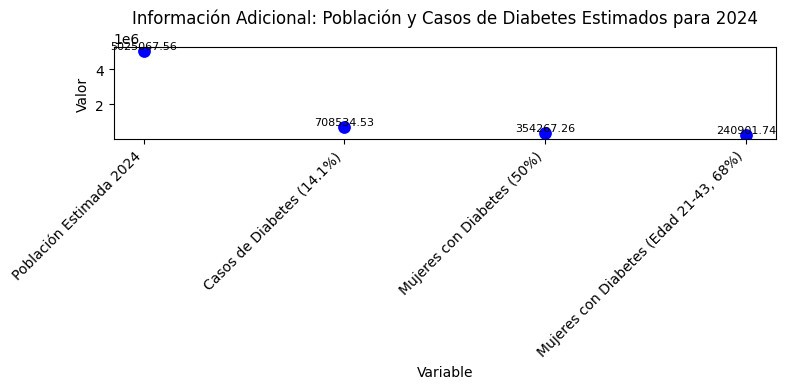

In [ ]:
# Calcular el 68% de mujeres con diabetes que tienen entre 21 y 43 años
mujeres_diabetes_edad_21_43 = mujeres_diabetes_2024 * 0.68

# Crear un nuevo DataFrame para mostrar la información adicional
info_adicional_df = pd.DataFrame({
    'Variable': ['Población Estimada 2024', 'Casos de Diabetes (14.1%)', 'Mujeres con Diabetes (50%)', 'Mujeres con Diabetes (Edad 21-43, 68%)'],
    'Valor': [poblacion_2024_estimada, casos_diabetes_2024, mujeres_diabetes_2024, mujeres_diabetes_edad_21_43]
})

# Mostrar la información adicional en forma de gráfico de puntos (scatter plot)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Variable', y='Valor', data=info_adicional_df, color='blue', s=100)

# Agregar etiquetas de datos
for i, valor in enumerate(info_adicional_df['Valor']):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Información Adicional: Población y Casos de Diabetes Estimados para 2024')
plt.ylabel('Valor')

# Rotar los nombres de los ejes x para evitar solapamiento
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar recorte de etiquetas
plt.tight_layout()

plt.show()



CALCULO PUNTO DE EQUILIBRIO Y ROI DEL PROYECTO DE EXPORTACION DE MERMELACHA

Un ROI negativo, como en este caso de -95%, indica que la inversión ha resultado en una pérdida. En otras palabras, por cada unidad monetaria invertida, hemos perdido el 95 centavos.
Se estima que el porcentaje de ROI aceptable en una campaña de marketing debe oscilar entre el 400% y 600%. En caso de conseguir un valor por debajo de estas cifras la empresa deberá mejorar sus estrategias para ampliar las posibilidades de obtener beneficios para la empresa.

ROI

In [ ]:
# Definir los valores proporcionados
VP = 68
FN = 13
VN = 42
FP = 31

# Ajustar el costo total considerando el 1% de conversión
costo_total = FN + FP / 0.01

# Calcular Beneficio Neto
beneficio_total = VP + VN

# Calcular ROI en porcentaje
roi = (beneficio_total - costo_total) / costo_total * 100

print(f"ROI considerando 1% de conversión: {roi:.2f}%")

ROI considerando 1% de conversión: -96.47%


PUNTO DE EQUILIBRIO

In [ ]:
# Definir los valores proporcionados
precio_venta = 2277
costo_distribucion_por_muestra = 103
costo_produccion = 700

# Calcular el margen de contribución por unidad
margen_contribucion_por_unidad = precio_venta - costo_distribucion_por_muestra - costo_produccion

# Supongamos que los costos fijos son $500,000 (ajusta según tu situación)
costos_fijos = 500000

# Calcular el Punto de Equilibrio en Unidades
punto_equilibrio_unidades = costos_fijos / margen_contribucion_por_unidad

print(f"Punto de Equilibrio en Unidades: {punto_equilibrio_unidades:.0f}")

Punto de Equilibrio en Unidades: 339


Cuando se enfrenta a la necesidad de un rendimiento excepcionalmente alto o al manejo de grandes conjuntos de datos, a menudo se opta por utilizar sistemas de gestión de bases de datos más robustos. Ejemplos de estas soluciones incluyen PostgreSQL, MySQL, o bases de datos NoSQL, seleccionadas según los requisitos específicos del proyecto. Esto cobra especial relevancia considerando que nuestro conjunto de datos consistirá al comienzo en aproximadamente en 1.241.439 filas y 9 columnas según el archivo CSV mencionado. Estas bases de datos más potentes están diseñadas para manejar volúmenes significativos de información y ofrecen rendimiento y escalabilidad superiores en comparación con soluciones más livianas como SQLite.

ANEXO: VOY A ESTIMAR DEMANDA POTENCIAL EN MERCADO OBJETIVO NACIONAL
Tomaré personas que viven en Buenos Aires, en viviendas particulares

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Población.xlsx to Población.xlsx


In [ ]:
# Obtener el nombre del archivo
file_name = next(iter(uploaded))

In [ ]:
# Leer el archivo Excel y cargarlo en un DataFrame
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

In [ ]:
# Verificar el DataFrame
print(df.head())

  Cuadro 1. Total del país. Viviendas particulares, viviendas colectivas, población en viviendas particulares, población en viviendas colectivas y población en situación de calle (vía pública), por jurisdicción. Año 2022  \
0                                                NaN                                                                                                                                                                           
1                                       Jurisdicción                                                                                                                                                                           
2                                              Total                                                                                                                                                                           
3                    Ciudad Autónoma de Buenos Aires                                                    

In [ ]:
 #Leer el archivo Excel y cargarlo en un DataFrame, saltando la primera fila
df = pd.read_excel(io.BytesIO(uploaded[file_name]), skiprows=1)

In [ ]:
# Reemplazar NaN en la primera fila con nombres de columnas personalizados
df.columns = df.iloc[0].fillna('NombreColumna').values
df = df[1:]

In [ ]:
# Verificar el DataFrame
print(df.head())

                                        Jurisdicción  \
1                                              Total   
2                    Ciudad Autónoma de Buenos Aires   
3                                       Buenos Aires   
4                  24 Partidos del Gran Buenos Aires   
5  Resto de partidos de la Provincia\nde Buenos A...   

  Total de viviendas particulares Total de viviendas colectivas  \
1                        17780210                         25501   
2                         1638764                          1946   
3                         6695273                          6535   
4                         3714607                          1383   
5                         2980666                          5152   

  Total de población Población en viviendas particulares  \
1           46044703                            45767858   
2            3120612                             3092942   
3           17569053                            17450899   
4           10865182

In [ ]:
# Seleccionar solo las columnas 'Jurisdicción' y 'Población en viviendas particulares'
columnas_seleccionadas = ['Jurisdicción', 'Población en viviendas particulares']
nuevo_df = df[columnas_seleccionadas]

In [ ]:
# Mostrar el DataFrame resultante
print(nuevo_df)

                                         Jurisdicción  \
1                                               Total   
2                     Ciudad Autónoma de Buenos Aires   
3                                        Buenos Aires   
4                   24 Partidos del Gran Buenos Aires   
5   Resto de partidos de la Provincia\nde Buenos A...   
6                                           Catamarca   
7                                               Chaco   
8                                              Chubut   
9                                             Córdoba   
10                                         Corrientes   
11                                         Entre Ríos   
12                                            Formosa   
13                                              Jujuy   
14                                           La Pampa   
15                                           La Rioja   
16                                            Mendoza   
17                             

In [ ]:
# Lista de jurisdicciones de interés
jurisdicciones_interes = ["Ciudad Autónoma de Buenos Aires", "Buenos Aires", "24 Partidos del Gran Buenos Aires", "Resto de partidos de la Provincia de Buenos Aires"]

In [ ]:
# Filtrar por las jurisdicciones de interés
poblacion_interes = nuevo_df[nuevo_df['Jurisdicción'].isin(jurisdicciones_interes)]

In [ ]:
# Sumar la población en viviendas particulares de las jurisdicciones de interés
poblacion_total = poblacion_interes['Población en viviendas particulares'].sum()

In [ ]:
# Mostrar la población total: mi muestra
print(f"Población total en viviendas particulares de las jurisdicciones de interés: {poblacion_total}")

Población total en viviendas particulares de las jurisdicciones de interés: 31361349


Mi muestra será de 31.361.349 habitantes que podrían consumir mi producto y yo podría enviarle una muestra a bajo costo por ser residentes de Buenos Aires.
El 60,9% de la población tiene obra social, prepaga o cobertura de PAMI.
Se estima que el 13% de la población podría padecer diabetes, lo que reduce mi muestra a 2.482.878 habitantes y, teniendo en cuenta el 50% para tomar sólo mujeres mi muestra sería: 1.241.439 habitantes= mercado potencial

In [ ]:
# Definir el valor inicial
valor_inicial = 31361349

# Calcular el 60.9%
porcentaje_1 = valor_inicial * 0.609

# Calcular el 13% del resultado anterior
con_diabetes = porcentaje_1 * 0.13

# Calcular el 50% del valor con diabetes
mitad_con_diabetes = con_diabetes * 0.5

# Imprimir el resultado en color rojo y tamaño de fuente 30
print(f"Demanda estimada máxima con diabetes: {mitad_con_diabetes}")

Demanda estimada máxima con diabetes: 1241439.000165


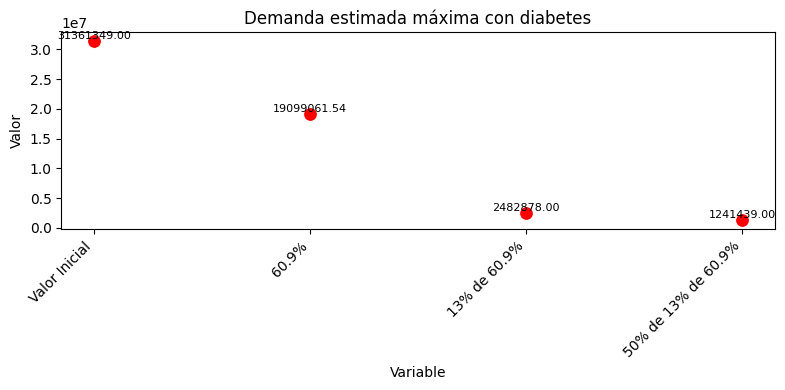

In [ ]:
# Definir el valor inicial
valor_inicial = 31361349

# Calcular el 60.9%
porcentaje_1 = valor_inicial * 0.609

# Calcular el 13% del resultado anterior
con_diabetes = porcentaje_1 * 0.13

# Calcular el 50% del valor con diabetes
mitad_con_diabetes = con_diabetes * 0.5

# Crear un DataFrame con la información
info_df = pd.DataFrame({
    'Variable': ['Valor Inicial', '60.9%', '13% de 60.9%', '50% de 13% de 60.9%'],
    'Valor': [valor_inicial, porcentaje_1, con_diabetes, mitad_con_diabetes]
})

# Mostrar la información en forma de gráfico de puntos (scatter plot)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Variable', y='Valor', data=info_df, color='red', s=100)

# Agregar etiquetas de datos
for i, valor in enumerate(info_df['Valor']):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Demanda estimada máxima con diabetes')
plt.ylabel('Valor')

# Rotar los nombres de los ejes x para evitar solapamiento
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar recorte de etiquetas
plt.tight_layout()

plt.show()